In [1]:
from loadTDMS import *
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
from tqdm import tqdm
from fft_test import *
from fft_test_not2power import *

In [2]:
x = np.random.rand(25000)

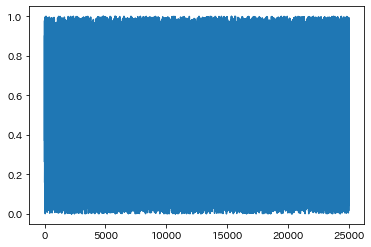

In [3]:
plt.plot(x)

In [30]:
N = 2**14 # データ数
N2 = 2**14 - 1000


n = np.arange(N)
n2 = np.arange(N2)
f1 = 2 # 周期
f2 = 6 
f3 = 150000
f = np.sin(f1 * 2 * np.pi * (n/N)) + np.sin(f2 * 2 * np.pi * (n/N))  + 3*np.sin(f3 * 2 * np.pi * (n/N))
f2 = np.sin(f1 * 2 * np.pi * (n2/N2)) + np.sin(f2 * 2 * np.pi * (n2/N2))  + 3*np.sin(f3 * 2 * np.pi * (n2/N2))


# グラフ表示
plt.figure(figsize=(8, 4))
plt.xlabel('n')
plt.ylabel('Signal')
# plt.plot(f)
plt.plot(f2)

In [33]:
%matplotlib qt

# 高速フーリエ変換(FFT)
F = np.fft.fft(f2)
F2 = np.fft.fft(f2,N)

print(len(F))
print(len(F2))

# FFT結果（複素数）を絶対値に変換
F_abs = np.abs(F)
F_abs2 = np.abs(F2)

# 振幅を元に信号に揃える
F_abs_amp = F_abs / N2 * 2 # 交流成分はデータ数で割って2倍する
F_abs_amp2 = F_abs2 / N * 2

# グラフ表示（データ数の半分の周期を表示）
plt.plot(F_abs_amp[:int(N2/2)+1])
plt.plot(F_abs_amp2[:int(N/2+1)])

15384
16384


In [6]:
path = rf'Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_3.tdms'
d = load_tdms(path, ch_num=3)
d = d[0]
d = d[:25000]
N = len(d)
dt = 1/10**6
# fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
fq = np.linspace(0, 1.0/dt, N)
fq2 = np.linspace(0, 1.0/dt, 2**15)

fq_out = fq[:int(N/2)+1]
fq_out2 = fq2[:int(2**15/2)+1]
len(fq_out2)

16385

In [38]:
plt.plot(d)

In [10]:
%matplotlib qt

F = np.fft.fft(d)
F2 = np.fft.fft(d,2**15)
F_abs = np.abs(F)
F_abs2 = np.abs(F2)
F_abs_amp = F_abs / N * 2
F_abs_amp2 = F_abs2 / 2**15 * 2

# window = np.hanning(N)

plt.plot(fq_out, 20 * np.log10(F_abs_amp[:int(N/2)+1]))
plt.plot(fq_out2, 20 * np.log10(F_abs_amp2[:int(2**15/2)+1]))


In [2]:
load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_3.tdms"
d = load_tdms(load_path, ch_num=3)
d = d[0]
d = d[:25000]

In [3]:
num = 3
dt = 1/10**6
split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
overlap = 0.5  # オーバーラップ率
window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
y_label = "amplitude"
y_unit = "V"
N = len(d)
fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
output_FN = rf"C:\Users\pmg07\Desktop\testFFT"

fq_, amp_ = FFT_main(fq, d, dt, split_t_r, overlap, window_F)
fq2_, amp2_ = FFT_main2(fq, d, dt, split_t_r, overlap, window_F)
# plot_FFT(fq_, amp_, output_FN, y_label, y_unit,num)


32768
32768
32768
32768
32768
32768
32768
32768
32768
32768
32768
32768
32768
32768
32768
32768
32768
32768
32768
fq_ave1251


In [6]:
print(len(amp_))
print(len(amp2_))

1251
1251


In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlabel('freqency[kHz]', fontsize=16)

plt.ylabel(y_label+"[dB]", fontsize=16)

ax.set_xlim(0, 500000)
ax.set_xticklabels([0, 100, 200, 300, 400, 500])
ax.set_ylim(-120, 0)
ax.set_yticklabels([-120,-100, -80, -60, -40, -20,0])

plt.title(rf'{num}path')

plt.plot(fq_, 20 * np.log10(amp_))
# plt.plot(fq_out, 20 * np.log10(F_abs_amp[:int(N/2)+1]))
plt.plot(fq2_, 20 * np.log10(amp2_))
plt

ax.grid()
p = plt.tick_params(labelsize=16)
plt.tight_layout()